In [8]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

data = pd.read_csv('cleaned_survey_data.csv')


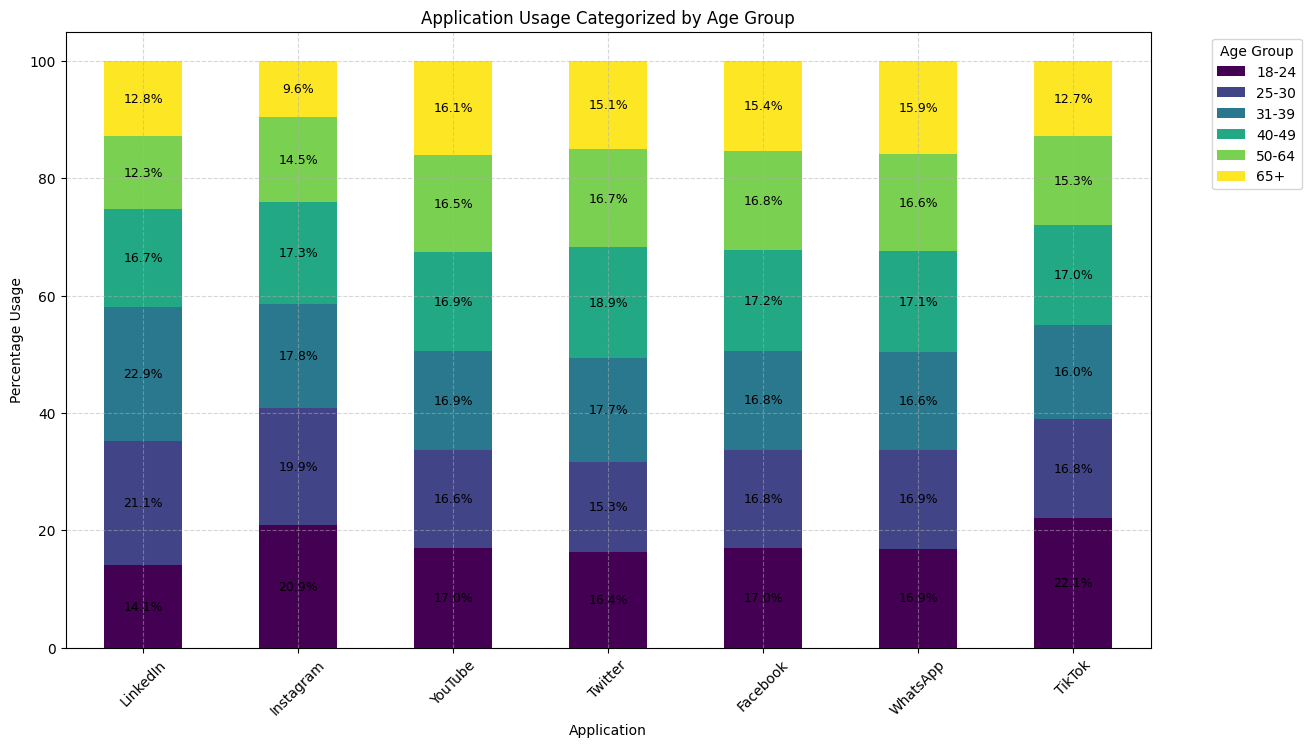

In [19]:
#dorin
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# List of apps to consider
apps = ['B-LinkedIn', 'B-Instagram', 'B-YouTube', 'B-Twitter', 'B-Facebook', 'B-WhatsApp', 'B-TikTok']

# Group data by 'Age_group' and calculate mean for each app (considering only users)
age_group_usage = data.groupby('Age_group')[apps].mean() * 100  # Convert proportion to percentage

# Normalize the data by each column to make sure sums to 100%
age_group_usage = age_group_usage.div(age_group_usage.sum(axis=0), axis=1) * 100

# Transpose the dataframe for plotting
age_group_usage = age_group_usage.T  # Transpose to make apps on x-axis

# Rename the columns to remove the 'B-' prefix
age_group_usage.index = age_group_usage.index.str.replace('B-', '')

# Plotting
ax = age_group_usage.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Application Usage Categorized by Age Group')
plt.xlabel('Application')
plt.ylabel('Percentage Usage')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Adding text labels inside the bars
for c in ax.containers:
    labels = [f"{v.get_height():.1f}%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=9)

plt.show()

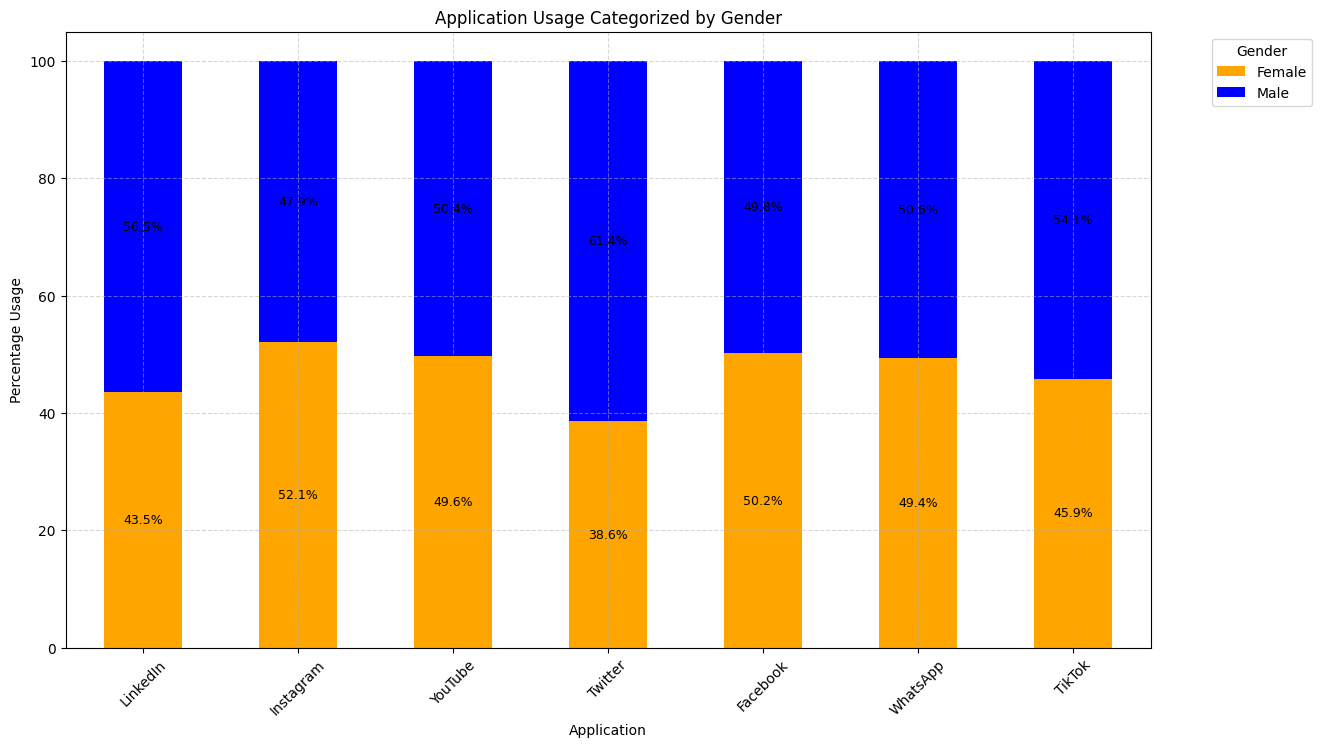

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# List of apps to consider
apps = ['B-LinkedIn', 'B-Instagram', 'B-YouTube', 'B-Twitter', 'B-Facebook', 'B-WhatsApp', 'B-TikTok']

# Group data by 'Gender' and calculate mean for each app (considering only users)
gender_usage = data.groupby('Gender')[apps].mean() * 100  # Convert proportion to percentage

# Normalize the data by each column to make sure sums to 100%
gender_usage = gender_usage.div(gender_usage.sum(axis=0), axis=1) * 100

# Transpose the dataframe for plotting
gender_usage = gender_usage.T  # Transpose to make apps on x-axis

# Rename the columns to remove the 'B-' prefix
gender_usage.index = gender_usage.index.str.replace('B-', '')

# Define custom colors
colors = {'Male': 'blue', 'Female': 'orange'}

# Plotting
ax = gender_usage.plot(kind='bar', stacked=True, figsize=(14, 8), color=[colors[col] for col in gender_usage.columns])
plt.title('Application Usage Categorized by Gender')
plt.xlabel('Application')
plt.ylabel('Percentage Usage')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Adding text labels inside the bars
for c in ax.containers:
    labels = [f"{v.get_height():.1f}%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=9)

plt.show()

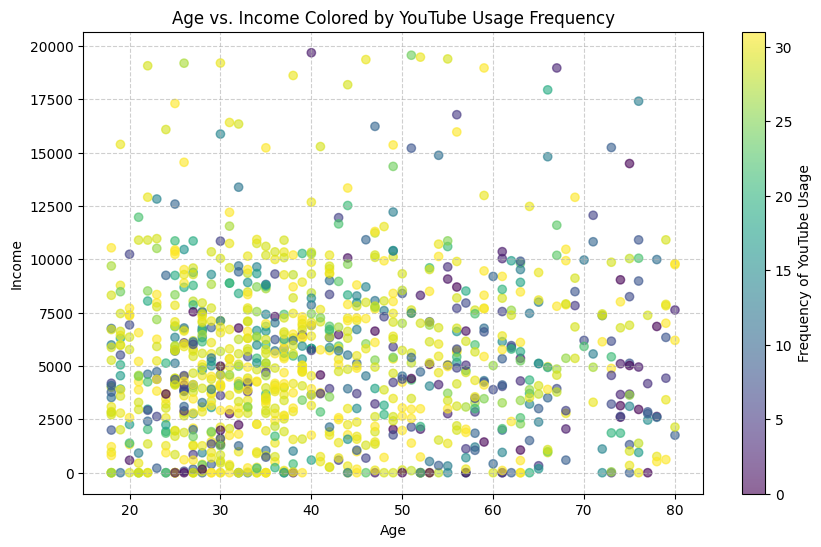

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure
plt.figure(figsize=(10, 6))

# Creating a scatter plot
scatter = plt.scatter(data['Age_group-num'], data['Income-num'],
                      c=data['Frequency-YouTube-num'], cmap='viridis', alpha=0.6)

# Adding color bar
plt.colorbar(scatter, label='Frequency of YouTube Usage')

# Setting the titles and labels
plt.title('Age vs. Income Colored by YouTube Usage Frequency')
plt.xlabel('Age')
plt.ylabel('Income')

# Displaying the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


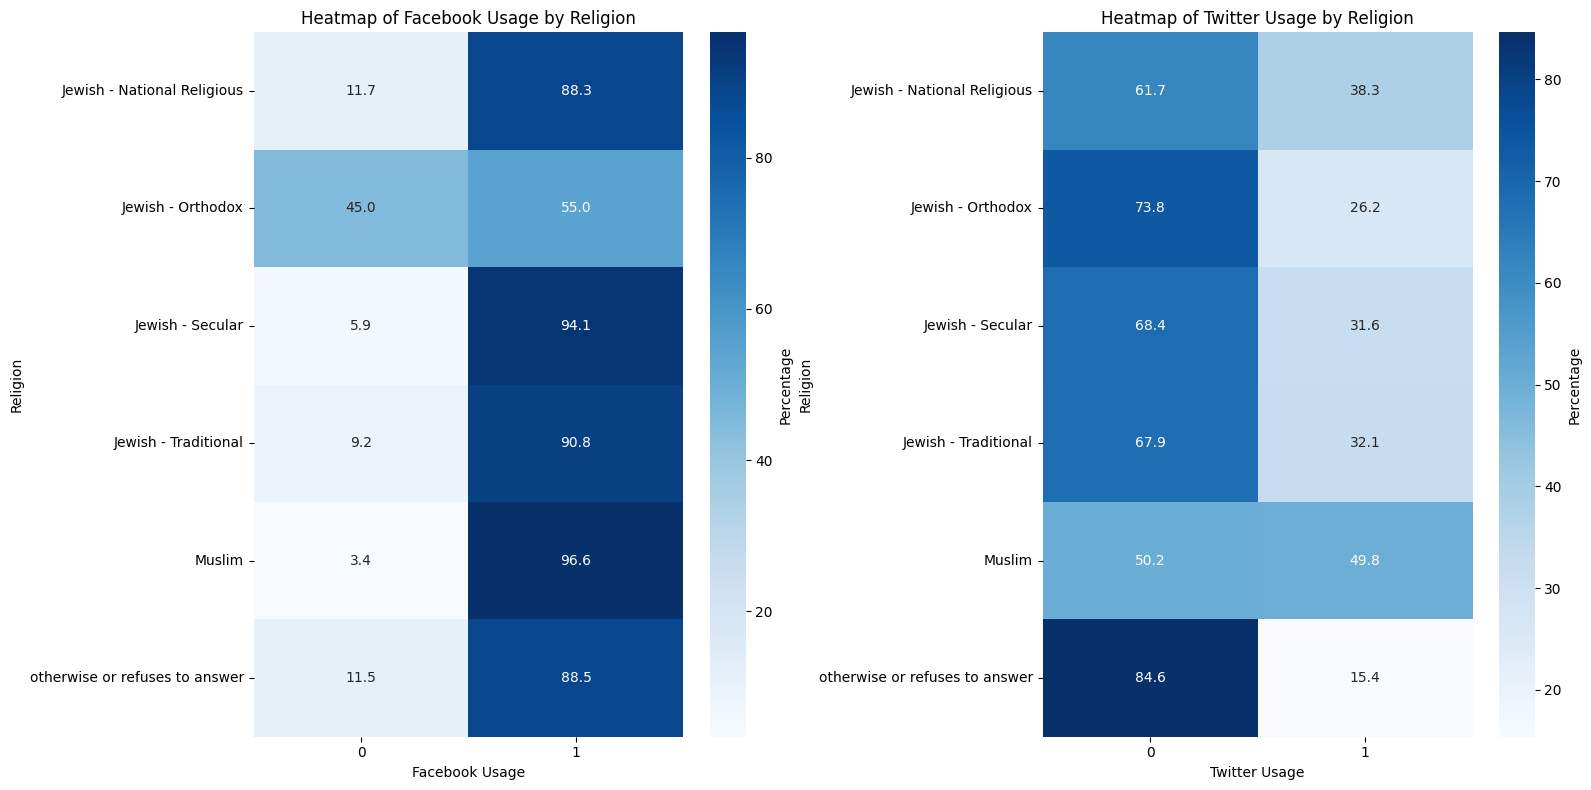

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating a crosstab for Facebook
facebook_ct = pd.crosstab(data['Religion'], data['B-Facebook'], normalize='index') * 100

# Creating a crosstab for Twitter
twitter_ct = pd.crosstab(data['Religion'], data['B-Twitter'], normalize='index') * 100

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Heatmap for Facebook Usage
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(facebook_ct, annot=True, fmt=".1f", cmap='Blues', cbar_kws={'label': 'Percentage'})
plt.title('Heatmap of Facebook Usage by Religion')
plt.xlabel('Facebook Usage')
plt.ylabel('Religion')

# Heatmap for Twitter Usage
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.heatmap(twitter_ct, annot=True, fmt=".1f", cmap='Blues', cbar_kws={'label': 'Percentage'})
plt.title('Heatmap of Twitter Usage by Religion')
plt.xlabel('Twitter Usage')
plt.ylabel('Religion')

# Show the plot
plt.tight_layout()
plt.show()


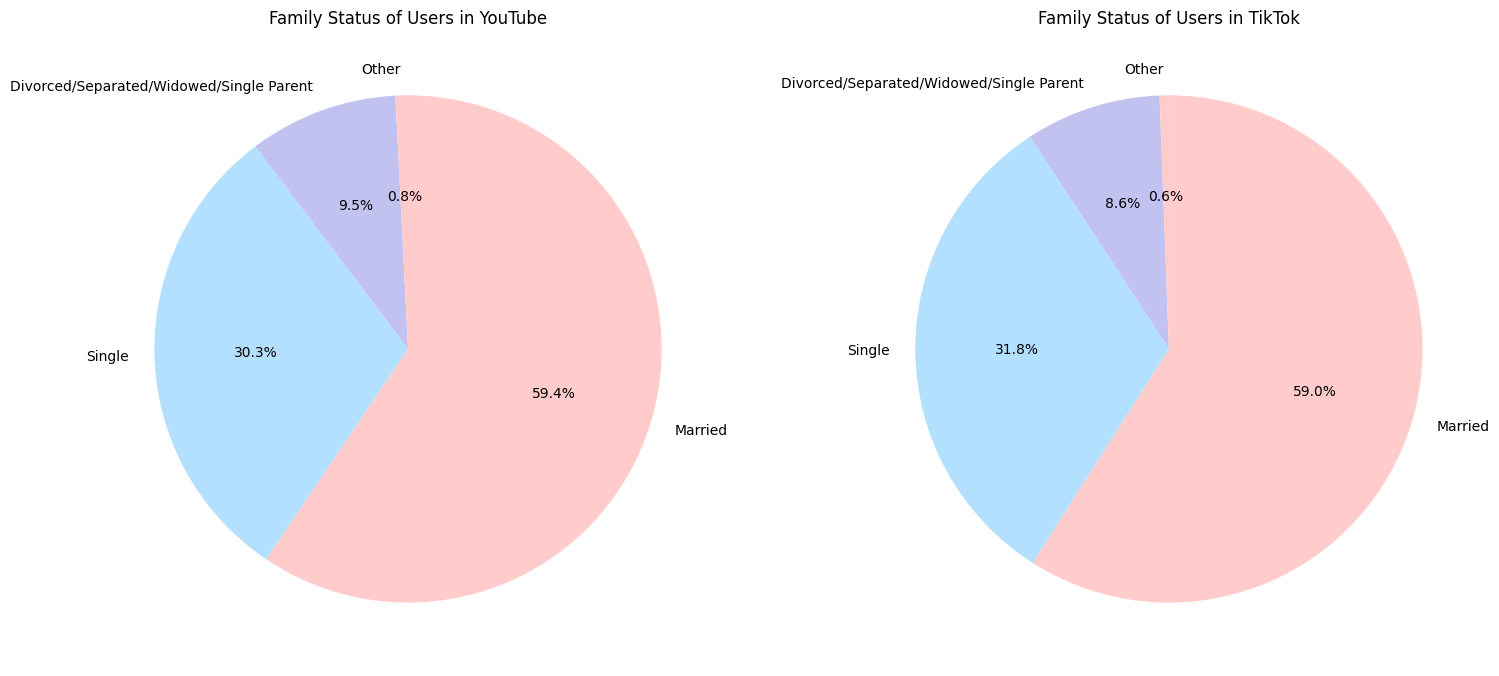

In [21]:
# Function to prepare pie chart data and plot
def plot_pie_chart(data, column, ax, title):
    # Count the occurrences of each family status for users (value = 1)
    status_counts = data[data[column] == 1]['FamilyStatus'].value_counts().sort_values(ascending=False)

    # Define lighter color palette
    colors = ['#ffcccb', '#b3e0ff', '#c2c2f0']  # Light red, light blue, light purple

    # Plot pie chart
    ax.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
    ax.set_title(title)

# Create figure and axes objects
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Plot for B-YouTube
plot_pie_chart(data, 'B-YouTube', axes[0], 'Family Status of Users in YouTube')

# Plot for B-TikTok
plot_pie_chart(data, 'B-TikTok', axes[1], 'Family Status of Users in TikTok')

# Show the plot
plt.show()